In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn; seaborn.set()

In [2]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

import tensorflow as tf
import numpy as np

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [4]:
# Training Data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71 ,6.93,
                         4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654,
                         9.27, 3.1, 12.21, 6.12, 8.24])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694,
                         1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42,
                         2.94, 1.3, 3.2, 1.6, 1.8])
n_samples = train_X.shape[0]

print(train_X.shape)
print(train_Y.shape)

(20,)
(20,)


In [5]:
# tf Grapth Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# Create Model
## Set Model Weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [7]:
# Construct a Linear model
activation = tf.add(tf.multiply(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2*n_samples) #L2 Loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient Descent

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost = 26.560943604 W = -0.480893 b = -1.52975
Epoch: 0051 cost = 0.417878926 W = 0.488565 b = -1.25135
Epoch: 0101 cost = 0.380324006 W = 0.470959 b = -1.11466
Epoch: 0151 cost = 0.347296774 W = 0.454446 b = -0.98645
Epoch: 0201 cost = 0.318252712 W = 0.438959 b = -0.866201
Epoch: 0251 cost = 0.292711347 W = 0.424433 b = -0.753417
Epoch: 0301 cost = 0.270251423 W = 0.410808 b = -0.647637
Epoch: 0351 cost = 0.250501096 W = 0.39803 b = -0.548424
Epoch: 0401 cost = 0.233134270 W = 0.386045 b = -0.455372
Epoch: 0451 cost = 0.217863530 W = 0.374804 b = -0.368097
Epoch: 0501 cost = 0.204436392 W = 0.364262 b = -0.286241
Epoch: 0551 cost = 0.192630500 W = 0.354373 b = -0.209467
Epoch: 0601 cost = 0.182250589 W = 0.345099 b = -0.137459
Epoch: 0651 cost = 0.173124582 W = 0.336401 b = -0.069923
Epoch: 0701 cost = 0.165101320 W = 0.328242 b = -0.00657972
Epoch: 0751 cost = 0.158047944 W = 0.32059 b = 0.0528307
Epoch: 0801 cost = 0.151847333 W = 0.313414 b = 0.108553
Epoch: 0851 cost 

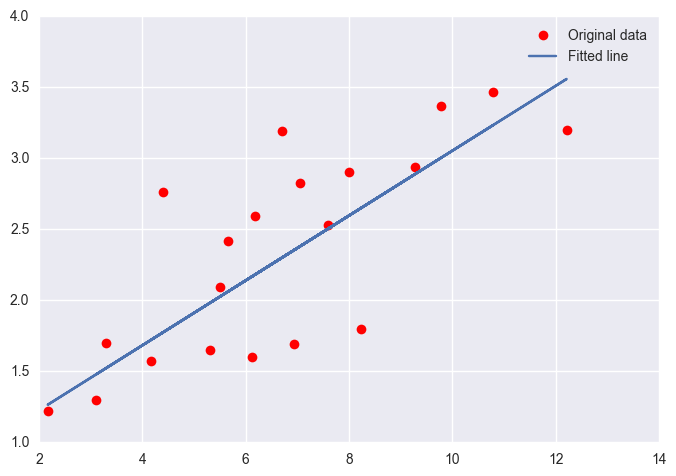

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost =", \
            "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
            "W =", sess.run(W), "b =", sess.run(b))

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    pred_Y = sess.run(W) * train_X + sess.run(b)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, pred_Y, label='Fitted line')
    plt.legend()
    plt.show()